# Overview
1. Entropy Market (use avgmean_mkt - quantitative measure) 
2. Entropy market ( use sentiment score ) 
3. Text_d_market and use sentiment score

use regression_analysis_mkt_with_ent_sent_jan18.dta, clear

## Note - use june9 version to include text dispersion measured by mean and p50 

In [28]:
use regression_analysis_mkt_with_ent_sent_june9.dta, clear

In [29]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~t |      1,528    .4637286    .3349317          0    .886075


In [5]:
su  sum_quotes,d


                     (first) sum_quotes
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            0                      Mean           2.388089
                        Largest       Std. Dev.      6.625488
75%            2             61
90%            6             68       Variance       43.89709
95%           12             71       Skewness       6.146999
99%           36             91       Kurtosis       54.01926


In [6]:
su log_sum_quotes,d


                     Market Transaction
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            0                      Mean           .6238486
                        Largest       Std. Dev.      .8885453
75%     1.098612       4.127134
90%      1.94591       4.234107       Variance       .7895127
95%     2.564949       4.276666       Skewness         1.5069
99%     3.610918       4.521789       Kurtosis       4.834784


# Market Level Use Winning Quotes and Quantitative Dispersion Measures

## 0. Without Entropy, only Average 

In [8]:
corr log_sum_quotes log_sum_givenquotes avgmean_mkt log_zip_rev experience 

(obs=1,027)

             | log_su.. l~give~s avgmea~t log_zi~v experi~e
-------------+---------------------------------------------
log_sum_qu~s |   1.0000
log_sum_gi~s |   0.7331   1.0000
 avgmean_mkt |  -0.0285  -0.1410   1.0000
 log_zip_rev |   0.3045   0.2374  -0.0407   1.0000
  experience |   0.2296   0.2733  -0.1060   0.5228   1.0000



In [11]:
su avgmean_mkt, d


                         Rating Avg
-------------------------------------------------------------
      Percentiles      Smallest
 1%            4              3
 5%     4.333333       3.645833
10%     4.666667       3.666667       Obs               1,027
25%     4.888889       3.666667       Sum of Wgt.       1,027

50%            5                      Mean           4.887787
                        Largest       Std. Dev.      .2379249
75%            5              5
90%            5              5       Variance       .0566083
95%            5              5       Skewness      -3.094295
99%            5              5       Kurtosis       13.93316







  Variables that uniquely identify margins: ent_mkt


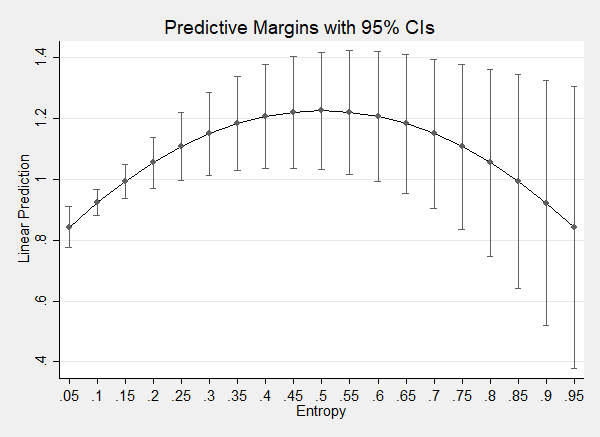

In [22]:
set scheme sj
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , fe vce(cluster market)
qui: margins , at(ent_mkt=(0.05(0.05)0.95))
marginsplot

## Use Hausman test to determine which (FE, RE) to use - Turns out it's Fixed Effect 

In [8]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,fe

estimates store fixed
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , re
estimates store random 
hausman fixed random







Note: the rank of the differenced variance matrix (18) does not equal the number of coefficients being tested
        (19); be sure this is what you expect, or there may be problems computing the test.  Examine the output of
        your estimators for anything unexpected and possibly consider scaling your variables so that the
        coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
     ent_mkt |     1.89164     3.772197       -1.880557        .1006757
   c.ent_mkt#|
   c.ent_mkt |   -1.892698    -4.056505        2.163807        .0601549
 avgmean_mkt |   -.0517693    -.0437709       -.0079984               .
 log_zip_rev |   -.1185435    -.0815356       -.0370079        .0082764
          c. |
 log_zip_rev#|
          c. |
 lo

In [9]:
su market


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      market |      1,528    18.64725    11.41016          0         36


### Test whether we should use Fixed effect 
by including i.marcket and see if F-test 

In [11]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  i.market
testparm i.market





 ( 1)  2.market = 0
 ( 2)  3.market = 0
 ( 3)  6.market = 0
 ( 4)  15.market = 0
 ( 5)  17.market = 0
 ( 6)  18.market = 0
 ( 7)  20.market = 0
 ( 8)  21.market = 0
 ( 9)  25.market = 0
 (10)  28.market = 0
 (11)  29.market = 0
 (12)  30.market = 0
 (13)  33.market = 0
 (14)  34.market = 0
 (15)  35.market = 0

           chi2( 15) =  239.35
         Prob > chi2 =    0.0000


## Label variables 

In [23]:
su ent_mkt,d


                     Rating_Entropy_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 808
25%            0              0       Sum of Wgt.         808

50%     .1169069                      Mean           .1855405
                        Largest       Std. Dev.      .2326058
75%     .3046361       1.011404
90%     .5091373        1.05492       Variance       .0541054
95%     .6365142        1.05492       Skewness       1.321511
99%     .9556999        1.05492       Kurtosis       4.451168


In [24]:
replace ent_mkt=1 if (ent_mkt!=.&ent_mkt>1)

(4 real changes made)


In [25]:
gen ent_mkt_demean=ent_mkt-.1763819


(720 missing values generated)


In [26]:
label variable ent_mkt "Rating_Entropy_Mkt"
label variable ent_mkt_demean "Rating_Entropy_Mkt"
label variable log_sum_quotes "Market_Transaction"
label variable avgmean_mkt "Average_Rating_Mkt"
label variable log_zip_rev "Market_LogRevenue"
label variable experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"

# Produce a simplified table to collect all market level results 

In [25]:
restore

In [41]:


preserve
drop  if ent_mkt==.
eststo clear
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(cluster market)
eststo
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
restore 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
//esttab using reg_mkt_simplified.csv, replace order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 




(724 observations deleted)



(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Market_T~n    F.Market_T~n   
----------------------------------------------------
Rating_Entropy_Mkt                          1.628** 
                                          (0.010)   

Rating_Entropy_Mkt~r                       -1.610** 
                                          (0.009)   

Average_Rating_Mkt         -0.273          -0.185   
                          (0.071)         (0.410)   

Experience                 0.0197*         0.0138   
                          (0.013)         (0.142)   

Price_Difference            0.239           0.287   
                          (0.282)         (0.284)   

Market_LogRevenue         -0.0846         -0.0663   
                          (0.057)         (0.140)   

Constant                    3.443**         2.672*  
                          (0.

## still demean the entropy_mkt 

In [41]:
su ent_mkt,d


                           Entropy
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%            0                      Mean           .1763819
                        Largest       Std. Dev.      .2290538
75%     .2945485       1.011404
90%     .5011469        1.05492       Variance       .0524656
95%     .6365142        1.05492       Skewness       1.392854
99%     .9556999        1.05492       Kurtosis       4.669032


## Hausman test 

In [4]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_* dummy*  , fe  
estimates store fixed
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_* dummy*  , re  
estimates store random
hausman fixed random







Note: the rank of the differenced variance matrix (17) does not equal the number of coefficients being tested (18); be sure this is what you expect, or there may be problems computing the test.  Examine the output of your estimators for anything
        unexpected and possibly consider scaling your variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
     ent_mkt |    2.054345     2.796286       -.7419414        .0810702
   c.ent_mkt#|
   c.ent_mkt |   -2.041724     -2.89956         .857836        .0741859
 avgmean_mkt |   -.0324186     -.037557        .0051384               .
 log_zip_rev |   -.0174255    -.0111728       -.0062527        .0012036
  experience |    .0147442    -.0051912        .0199354        .

## marginsplot

In [27]:
su ent_mkt_demean,d


                     Rating_Entropy_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%    -.1763819      -.1763819
 5%    -.1763819      -.1763819
10%    -.1763819      -.1763819       Obs                 808
25%    -.1763819      -.1763819       Sum of Wgt.         808

50%     -.059475                      Mean           .0089405
                        Largest       Std. Dev.      .2318155
75%     .1282542       .8236181
90%     .3327554       .8236181       Variance       .0537384
95%     .4601323       .8236181       Skewness       1.300719
99%      .779318       .8236181       Kurtosis       4.337099






  Variables that uniquely identify margins: ent_mkt_demean


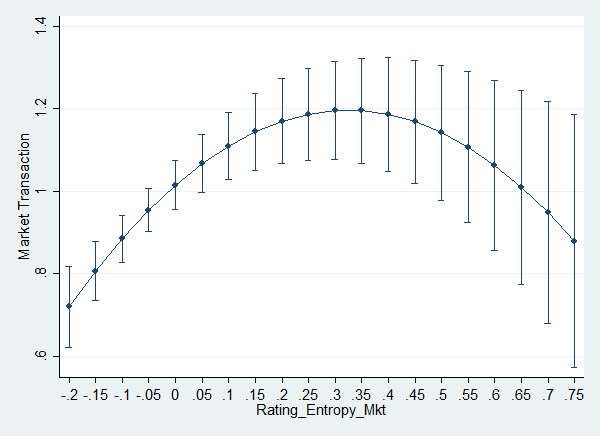

In [29]:
qui:areg f.log_sum_quotes ent_mkt_demean c.ent_mkt_demean#c.ent_mkt_demean  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,vce(robust) absorb(market)
qui: margins , at(ent_mkt_demean=(-0.2(0.05)0.75))
marginsplot,ytitle("Market Transaction") title("")

## VIF 

In [39]:
qui:reg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_*  ,vce(robust)  
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
     ent_mkt |      6.67    0.149965
   c.ent_mkt#|
   c.ent_mkt |      6.21    0.160950
 avgmean_mkt |      1.58    0.632615
 log_zip_rev |      1.45    0.690279
  experience |      1.46    0.685113
temp_own_p~r |      1.01    0.986885
-------------+----------------------
    Mean VIF |      3.06


In [14]:
su ent_mkt,d


                           Entropy
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%            0                      Mean           .1763819
                        Largest       Std. Dev.      .2290538
75%     .2945485       1.011404
90%     .5011469        1.05492       Variance       .0524656
95%     .6365142        1.05492       Skewness       1.392854
99%     .9556999        1.05492       Kurtosis       4.669032


In [15]:
gen ent_mkt_demean=ent_mkt-.1763819

(724 missing values generated)


In [17]:
label variable ent_mkt_demean "Entropy"

In [19]:
eststo clear

preserve
drop  if ent_mkt==.
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,  vce(robust) absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt_demean c.ent_mkt_demean#c.ent_mkt_demean  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,vce(robust) absorb(market)
eststo


esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace

restore 




(724 observations deleted)


(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Transact~n    F.Transact~n   
----------------------------------------------------
Rating Avg                 -0.273          -0.185   
                          (0.071)         (0.212)   

Mkt Revenue               -0.0846         -0.0663   
                          (0.057)         (0.123)   

Experience(Avg)            0.0197*         0.0138   
                          (0.013)         (0.073)   

Price Diff(Avg)             0.239           0.287   
                          (0.282)         (0.194)   

Entropy                                     1.060***
                                          (0.000)   

Entropy # Entropy                          -1.610***
                                          (0.000)   

Constant                    3.443**         2.909*  
                          (0.

## Dynamic Panel 

In [4]:
restore

nothing to restore


r(622);


### First let's review the areg model resuls 

In [5]:
eststo clear

preserve
drop  if ent_mkt==.
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
eststo


esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace

restore 




(724 observations deleted)


(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Transact~n    F.Transact~n   
----------------------------------------------------
Rating Avg                 -0.273*         -0.185   
                          (0.038)         (0.181)   

Mkt Revenue               -0.0846*        -0.0663   
                          (0.014)         (0.053)   

Experience(Avg)            0.0197**        0.0138   
                          (0.008)         (0.062)   

Price Diff(Avg)             0.239           0.287   
                          (0.195)         (0.124)   

Entropy                                     1.628***
                                          (0.000)   

Entropy # Entropy                          -1.610***
                                          (0.000)   

Constant                    3.443*          2.672   
                          (0.

### Dynamic Panel 

In [12]:
restore

In [92]:
gen ent_mkt_sq=ent_mkt*ent_mkt

variable ent_mkt_sq already defined


r(110);


In [22]:
label variable ent_mkt_sq "Entropy^2"

In [83]:
tab month


    (first) |
      month |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         91        9.74        9.74
          2 |         97       10.39       20.13
          3 |         97       10.39       30.51
          4 |         93        9.96       40.47
          5 |         67        7.17       47.64
          6 |         67        7.17       54.82
          7 |         66        7.07       61.88
          8 |         68        7.28       69.16
          9 |         69        7.39       76.55
         10 |         71        7.60       84.15
         11 |         74        7.92       92.08
         12 |         74        7.92      100.00
------------+-----------------------------------
      Total |        934      100.00


In [88]:
su ent*,d


                           Entropy
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%            0                      Mean           .1763819
                        Largest       Std. Dev.      .2290538
75%     .2945485       1.011404
90%     .5011469        1.05492       Variance       .0524656
95%     .6365142        1.05492       Skewness       1.392854
99%     .9556999        1.05492       Kurtosis       4.669032

                          Entropy^2
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%            0   

(bin=28, start=0, width=.03767572)


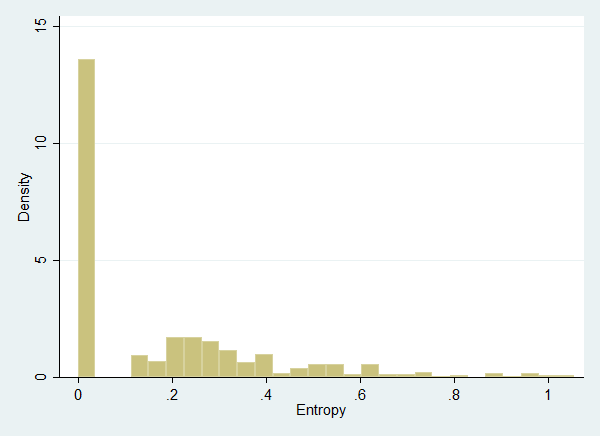

In [90]:
histogram ent_mkt

In [24]:
//gen ent_mkt_demean=ent_mkt-.083511
gen ent_mkt_demean_sq=ent_mkt_demean*ent_mkt_demean

(724 missing values generated)


In [25]:
//label variable ent_mkt_demean "Entropy"
label variable ent_mkt_demean_sq "Rating_Entropy_Mkt_sq"

In [26]:
save  regression_analysis_mkt_with_ent_sent_june1st.dta

file regression_analysis_mkt_with_ent_sent_june1st.dta saved


# Restart  wtih a saved data 

In [4]:
use   regression_analysis_mkt_with_ent_sent_june1st.dta, clear

In [11]:
gen log_experience=log(1+experience)

In [12]:
su log_experience


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
log_experi~e |      1,528    1.254828    1.102291          0   3.332205


In [29]:
restore

## Dynamic Panel 

In [31]:
eststo clear

preserve
drop  if ent_mkt==.
gen log_zip_rev_sq=log_zip_rev*log_zip_rev 
qui:areg f.log_sum_quotes   ent_mkt_demean ent_mkt_demean_sq    avgmean_mkt  log_zip_rev  log_zip_rev_sq experience temp_*    , absorb(market) vce(robust)
eststo

qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq,nocons vce(robust) lags(3) 
eststo


esttab,    drop( log_zip_rev_sq) p label scalars(r2 )

esttab using reg_mkt_dynamicpanel.csv,  drop( log_zip_rev_sq) p label scalars(r2 ) replace

restore 




(724 observations deleted)



(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Market_T~n    F.Market_T~n   
----------------------------------------------------
Rating_Entropy_Mkt          1.501***        0.751*  
                          (0.000)         (0.016)   

Rating_Entropy_Mkt~q       -2.456***       -1.609***
                          (0.000)         (0.000)   

Average_Rating_Mkt         -0.207          -0.141   
                          (0.169)         (0.476)   

Market_LogRevenue         -0.0264          0.0403   
                          (0.502)         (0.051)   

Experience                 0.0102        -0.00118   
                          (0.157)         (0.882)   

Price_Difference           0.0349          -0.313   
                          (0.865)         (0.089)   

Market_Transaction                         0.0238   
                            

In [93]:
qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq, vce(robust) lags(3) 
estat abond




Arellano-Bond test for zero autocorrelation in first-differenced errors
  +-----------------------+
  |Order |  z     Prob > z|
  |------+----------------|
  |   1  |-4.5326  0.0000 |
  |   2  |-1.5535  0.1203 |
  +-----------------------+
   H0: no autocorrelation 


In [97]:
qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq, twostep lags(3) 
estat sargan



Sargan test of overidentifying restrictions
        H0: overidentifying restrictions are valid

        chi2(544)    =  22.77427
        Prob > chi2  =    1.0000


In [55]:
gen month_sq=month*month

(594 missing values generated)


In [61]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  year,nocons vce(robust) lags(2)
estat abond



Arellano-Bond dynamic panel-data estimation     Number of obs     =        375
Group variable: market                          Number of groups  =         32
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   11.71875
                                                              max =         33

Number of instruments =    373                  Wald chi2(10)     =      70.91
                                                Prob > chi2       =     0.0000
One-step results
                                              (Std. Err. adjusted for clustering on market)
-------------------------------------------------------------------------------------------
                          |               Robust
         F.log_sum_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------

In [62]:
tabulate year, gen(dummy_year)


    (first) |
       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2013 |         84        8.99        8.99
       2014 |        161       17.24       26.23
       2015 |        177       18.95       45.18
       2016 |        192       20.56       65.74
       2017 |        190       20.34       86.08
       2018 |        130       13.92      100.00
------------+-----------------------------------
      Total |        934      100.00


In [69]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(4)
estat abond



Arellano-Bond dynamic panel-data estimation     Number of obs     =        585
Group variable: market                          Number of groups  =         34
Time variable: year_month~t
                                                Obs per group:
                                                              min =          2
                                                              avg =   17.20588
                                                              max =         33

Number of instruments =    551                  Wald chi2(11)     =     119.27
                                                Prob > chi2       =     0.0000
One-step results
                                              (Std. Err. adjusted for clustering on market)
-------------------------------------------------------------------------------------------
                          |               Robust
         F.log_sum_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------

In [79]:
xtabond f.log_sum_quotes   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(3)
estat abond



Arellano-Bond dynamic panel-data estimation     Number of obs     =        941
Group variable: market                          Number of groups  =         34
Time variable: year_month~t
                                                Obs per group:
                                                              min =          5
                                                              avg =   27.67647
                                                              max =         56

Number of instruments =    873                  Wald chi2(8)      =     346.76
                                                Prob > chi2       =     0.0000
One-step results
                                              (Std. Err. adjusted for clustering on market)
-------------------------------------------------------------------------------------------
                          |               Robust
         F.log_sum_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------

In [70]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(4) twostep
estat abond



Arellano-Bond dynamic panel-data estimation     Number of obs     =        585
Group variable: market                          Number of groups  =         34
Time variable: year_month~t
                                                Obs per group:
                                                              min =          2
                                                              avg =   17.20588
                                                              max =         33

Number of instruments =    551                  Wald chi2(11)     =      63.34
                                                Prob > chi2       =     0.0000
Two-step results
                                              (Std. Err. adjusted for clustering on market)
-------------------------------------------------------------------------------------------
                          |              WC-Robust
         F.log_sum_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
---------

In [75]:
areg f.log_sum_quotes  log_sum_quotes l.log_sum_quotes l2.log_sum_quotes l3.log_sum_quotes ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*, absorb(market) 



Linear regression, absorbing indicators         Number of obs     =        724
                                                F(  11,    679)   =      37.93
                                                Prob > F          =     0.0000
                                                R-squared         =     0.7675
                                                Adj R-squared     =     0.7524
                                                Root MSE          =     0.5180

-------------------------------------------------------------------------------------------
         F.log_sum_quotes |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
           log_sum_quotes |
                      --. |   .2626389   .0394106     6.66   0.000     .1852575    .3400203
                      L1. |   .1253847   .0403468     3.11   0.002     .0461652    .2046042
                      L2. |   .30695

## VIF test 

In [24]:
restore

In [25]:
eststo clear

preserve
drop  if ent_mkt==.
qui:reg f.log_sum_quotes   avgmean_mkt  log_zip_rev   experience temp_* 
vif
eststo
qui:reg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt     experience temp_* 
eststo
vif

esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 

restore 




(724 observations deleted)



    Variable |       VIF       1/VIF  
-------------+----------------------
  experience |      1.38    0.725918
 log_zip_rev |      1.37    0.727806
 avgmean_mkt |      1.01    0.988286
temp_own_p~r |      1.01    0.991246
-------------+----------------------
    Mean VIF |      1.19

(est1 stored)


(est2 stored)


    Variable |       VIF       1/VIF  
-------------+----------------------
     ent_mkt |      6.60    0.151502
   c.ent_mkt#|
   c.ent_mkt |      6.17    0.162168
 avgmean_mkt |      1.61    0.622656
  experience |      1.06    0.946285
temp_own_p~r |      1.01    0.992599
-------------+----------------------
    Mean VIF |      3.29

coefficient dummy* not found


r(111);
r(111);


## 2. Market Level Use Use Sentiment Score and Text-based Dispersion

In [7]:
br

In [8]:
su avg_sent_score_mkt,d


                    Average_Sentiment_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%     .6514486                      Mean           .4637286
                        Largest       Std. Dev.      .3349317
75%        .7269          .8663
90%        .7772       .8810667       Variance       .1121792
95%       .81905        .886075       Skewness      -.5681164
99%       .84945        .886075       Kurtosis       1.480154


In [35]:
restore

In [78]:
gen text_d_mkt_p50_sq=text_d_mkt_p50*text_d_mkt_p50

(530 missing values generated)


In [79]:
gen log_zip_rev_sq=log_zip_rev*log_zip_rev

In [80]:
label variable avg_sent_score_mkt "Average_Sentiment_Mkt"

In [81]:
eststo clear 
preserve 
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes   avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
//esttab using reg_mkt_withtext.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore




(724 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)   
                     F.Market_T~n    F.Market_T~n    F.Market_T~n    F.Market_T~n   
------------------------------------------------------------------------------------
Rating_Entropy_Mkt                                                          1.455***
                                                                          (0.000)   

Rating_Entropy_Mkt~r                                                       -1.384***
                                                                          (0.001)   

Average_Rating_Mkt         -0.273          -0.262                                   
                          (0.071)         (0.095)                                   

Average_Sentiment_~t                               

## deal with missing data 

In [82]:


preserve
drop  if ent_mkt==.
eststo clear
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(cluster market)
eststo
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
restore 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
//esttab using reg_mkt_simplified.csv, replace order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 




(724 observations deleted)



(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Market_T~n    F.Market_T~n   
----------------------------------------------------
Rating_Entropy_Mkt                          1.628** 
                                          (0.010)   

Rating_Entropy_Mkt~r                       -1.610** 
                                          (0.009)   

Average_Rating_Mkt         -0.273          -0.185   
                          (0.071)         (0.410)   

Experience                 0.0197*         0.0138   
                          (0.013)         (0.142)   

Price_Difference            0.239           0.287   
                          (0.282)         (0.284)   

Market_LogRevenue         -0.0846         -0.0663   
                          (0.057)         (0.140)   

Constant                    3.443**         2.672*  
                          (0.

In [12]:
su text_d_mkt_p50 ent_mkt if ent_mkt!=.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
text_d_mk~50 |        770    .1317497    .0369256   .0689014   .3658786
     ent_mkt |        808    .1855405    .2326058          0    1.05492


In [13]:
replace text_d_mkt_p50=.1311258 if (text_d_mkt_p50==.&ent_mkt!=.)

(38 real changes made)


In [16]:
su text_d_mkt_p50  text_d_mkt_mean ent_mkt if ent_mkt!=.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
text_d_mk~50 |        808    .1317204     .036046   .0689014   .3658786
text_d_mkt~n |        770    .1416026    .0339831   .0689014   .3658786
     ent_mkt |        808    .1855405    .2326058          0    1.05492


In [17]:
replace text_d_mkt_mean=.1416026 if (text_d_mkt_mean==.&ent_mkt!=.)

(38 real changes made)


In [18]:
eststo clear 
preserve 
drop  if ent_mkt==.
keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
esttab using reg_mkt_withtext.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore




(720 observations deleted)

(19 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Market T~n    F.Market T~n    F.Market T~n   
--------------------------------------------------------------------
Rating_Entropy_Mkt                                          1.008*  
                                                          (0.023)   

Rating_Entropy_Mkt~r                                       -1.092*  
                                                          (0.019)   

Average_Rating_Mkt         -0.159                                   
                          (0.249)                                   

Average_Sentiment_~t                       -1.353**        -1.344** 
                                          (0.006)         (0.006)   

Experience                 0.0140          0.0106         0.0

# 2 Robustness -  Market Level se Sentiment Score and Text-based Dispersion 

In [20]:
eststo clear 
preserve 
drop  if ent_mkt==.
keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
esttab using reg_mkt_rob_textmean.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore




(720 observations deleted)

(19 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Market T~n    F.Market T~n    F.Market T~n   
--------------------------------------------------------------------
Rating_Entropy_Mkt                                          1.003*  
                                                          (0.023)   

Rating_Entropy_Mkt~r                                       -1.079*  
                                                          (0.019)   

Average_Rating_Mkt         -0.159                                   
                          (0.252)                                   

Average_Sentiment_~t                       -1.310**        -1.303** 
                                          (0.008)         (0.008)   

Experience                 0.0139          0.0108         0.0

# 3.Use Given Quotes instead of winning quotes 

# 4.Summary stats 

In [36]:
restore

In [13]:
preserve
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:  areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
predict yhat_filter,xb
drop if yhat_filter==.
keep if f.log_sum_quotes!=.
set matsize 2000
qui: outreg2 using summarystats_mkt.doc, label replace sum(detail) keep( log_sum_quotes   ent_mkt   avgmean_mkt    log_zip_rev  log_experience temp_* ) eqkeep(N mean sd min max)
restore



(724 observations deleted)


(21 missing values generated)

(21 observations deleted)

(141 observations deleted)


 : 


In [1]:
pwd

C:\Users\Herbie Huang\Google Drive\Current_SolarResearch\working_2020


In [ ]:
restore

In [30]:
set matsize 2000

In [32]:
pwd

C:\Users\Herbie Huang\Google Drive\Current_SolarResearch\working_2020


In [43]:
su text_d_mkt_p50 ent_mkt


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
text_d_mk~50 |        998    .1306127    .0404729   .0545641   .3658786
     ent_mkt |        808    .1853224    .2318155          0          1


In [3]:
su avg*

no variables defined


r(111);


In [16]:
restore

In [26]:
su avg_sent_* if _est_filter==1

_est_filter not found


r(111);


In [23]:
su text_d_mkt_p50


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
text_d_mk~50 |        998    .1306127    .0404729   .0545641   .3658786


In [27]:
preserve
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:xtreg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt c.avg_sent_score_mkt#c.avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* , fe vce(cluster market)
eststo filter
drop if _est_filter==0
su avg_sent*
//su text_d_mkt_p50 text_d_mkt_mean avg_sent_score_mkt
//qui: outreg2 using summarystats_text_mkt.doc, label replace sum(detail) keep( text_d_mkt_p50 avg_sent_score_mkt) eqkeep(N mean sd min max) 
asdoc cor     text_d_mkt_p50 ent_mkt avg_sent_score_mkt avgmean_mkt    experience temp_* log_zip_rev , label replace
restore



(724 observations deleted)



(181 observations deleted)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~t |        623    .6587071    .1423955          0      .8663

(obs=611)

             | text_~50  ent_mkt avg_se~t avgmea~t experi~e temp_o~r log_zi~v
-------------+---------------------------------------------------------------
text_d_mk~50 |   1.0000
     ent_mkt |   0.0676   1.0000
avg_sent_s~t |  -0.4298   0.1177   1.0000
 avgmean_mkt |  -0.0971  -0.6241   0.1732   1.0000
  experience |  -0.1135   0.1981   0.0534  -0.1073   1.0000
temp_own_p~r |   0.1267  -0.0177   0.0166  -0.0410  -0.0120   1.0000
 log_zip_rev |  -0.0869   0.1569   0.2299  -0.0409   0.4985  -0.1257   1.0000

(note: file Myfile.doc not found)
Click to Open File:  Myfile.doc



In [20]:
corr avg*

(obs=1,027)

             | avgmea~t avg_se~t
-------------+------------------
 avgmean_mkt |   1.0000
avg_sent_s~t |   0.1823   1.0000



In [30]:
ssc install asdoc

checking asdoc consistency and verifying not already installed...
installing into c:\ado\plus\...
installation complete.


# Robustness - Spline Regression

In [43]:
mkspline ent_mkt_spl_2 2=ent_mkt,displayknots
mkspline ent_mkt_spl_3 3=ent_mkt, displayknots



             |     knot1 
-------------+-----------
     ent_mkt |  .5274601 


             |     knot1      knot2 
-------------+----------------------
     ent_mkt |  .3516401   .7032801 


In [44]:
label variable ent_mkt_spl_21 "Rating_Entropy_Mkt_1"
label variable ent_mkt_spl_22 "Rating_Entropy_Mkt_2"
label variable ent_mkt_spl_31 "Rating_Entropy_Mkt_3"
label variable ent_mkt_spl_32 "Rating_Entropy_Mkt_1"
label variable ent_mkt_spl_33 "Rating_Entropy_Mkt_2"

In [46]:
restore

In [47]:
eststo clear

preserve
drop  if ent_mkt==.
 
qui:areg f.log_sum_quotes ent_mkt_spl_2*  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_*  , absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt_spl_3*  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_*   , absorb(market)
eststo


esttab,  keep(ent_mkt_spl_2* ent_mkt_spl_3*) p label scalars(r2 aic bic) 
esttab using rob_spline_mkt.csv,  replace keep(ent_mkt_spl_2* ent_mkt_spl_3*) p label scalars(r2 aic bic) 
 
restore 




(724 observations deleted)


(est1 stored)


(est2 stored)


----------------------------------------------------
                              (1)             (2)   
                     F.Market_T~n    F.Market_T~n   
----------------------------------------------------
Rating_Entropy_Mkt_1        1.197***                
                          (0.000)                   

Rating_Entropy_Mkt_2       -1.144**                 
                          (0.008)                   

Rating_Entropy_Mkt_3                        2.157***
                                          (0.000)   

Rating_Entropy_Mkt_1                       -2.100***
                                          (0.000)   

Rating_Entropy_Mkt_2                        0.356   
                                          (0.606)   
----------------------------------------------------
Observations                  642             642   
r2                          0.720           0.732   
aic                        1101

In [19]:
su log_sum_quotes,d


                         Transaction
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            0                      Mean           .6238486
                        Largest       Std. Dev.      .8885453
75%     1.098612       4.127134
90%      1.94591       4.234107       Variance       .7895127
95%     2.564949       4.276666       Skewness         1.5069
99%     3.610918       4.521789       Kurtosis       4.834784


(bin=31, start=0, width=.14586415)


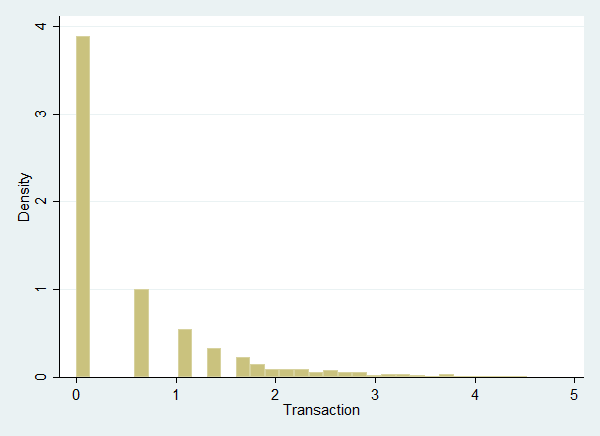

In [18]:
histogram log_sum_quotes